In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 3.0 MB/s eta 0:00:003.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 27.8 MB/s eta 0:00:0031m21.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.5/167.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.3/410.3 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 17.3 MB/s eta 0:00:00


# Importing Required Libraries

In [3]:
# Web links Handler
import requests

# Backend
import torch

# Image Processing
from PIL import Image

# Transformer and Pretrained Model
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, GPT2TokenizerFast

# Managing loading processing
from tqdm import tqdm

# Assign available GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

/Users/javier.jimenez/.pyenv/versions/3.11.3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Using ViT GPT2 Image Captioning Model

In [4]:

# Loading a fine-tuned image captioning Transformer Model

# ViT Encoder - Decoder Model
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)

# Corresponding ViT Tokenizer
tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Image processor
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

/Users/javier.jimenez/.pyenv/versions/3.11.3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [16]:
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

# Performing Inference on Image

In [60]:
# Image Inference
def get_caption(model, image_processor, tokenizer, image_path):
    image = load_image(image_path)

    # Preprocess the image
    img = image_processor(image, return_tensors="pt").to(device)

    # Generate the caption
    output = model.generate(**img)

    # If output is a 2D tensor, we need to convert it to 1D
    if output.dim() == 2:
        output = output[0]

    # Decode and return the caption
    caption = tokenizer.decode(output, skip_special_tokens=True)

    return caption

# Examples of Inference   

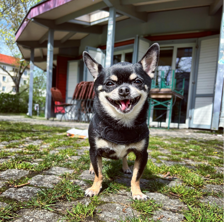

'a dog standing on a sidewalk outside a house '

In [61]:
#  Image media display
from IPython.display import display

image_path = "../data/images/resized/photo-0001.png"

# Display the image
display(load_image(image_path))

# Display Caption
get_caption(model, image_processor, tokenizer, image_path)

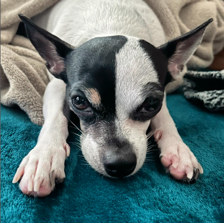

'a dog laying on a blanket on the floor '

In [64]:
#  Image media display
from IPython.display import display

image_path = "../data/images/resized/photo-0002.png"

# Display the image
display(load_image(image_path))

# Display Caption
get_caption(model, image_processor, tokenizer, image_path)

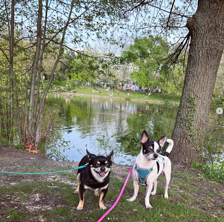

'two dogs are playing with a frisbee in the park '

In [65]:
#  Image media display
from IPython.display import display

image_path = "../data/images/resized/photo-0006.png"

# Display the image
display(load_image(image_path))

# Display Caption
get_caption(model, image_processor, tokenizer, image_path)